In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

# Understand data

In [2]:
# Set base path to your dataset
base_path = "/kaggle/input/ariel-data-challenge-2025"

# Load metadata files
train_df = pd.read_csv(f"{base_path}/train.csv")
train_star_info = pd.read_csv(f"{base_path}/train_star_info.csv")
wavelengths_df = pd.read_csv(f"{base_path}/wavelengths.csv")
adc_info = pd.read_csv(f"{base_path}/adc_info.csv")


# Preview data
print("🔭 train.csv")
print(train_df.head())

print("\n🌟 train_star_info.csv")
print(train_star_info.head())

print("\n🌈 wavelengths.csv")
print(wavelengths_df.head())

print("\n📈 adc_info.csv")
print(adc_info)


🔭 train.csv
   planet_id      wl_1      wl_2      wl_3      wl_4      wl_5      wl_6  \
0      34983  0.018291  0.018088  0.018087  0.018085  0.018084  0.018084   
1    1873185  0.006347  0.006343  0.006343  0.006343  0.006343  0.006343   
2    3849793  0.046061  0.046139  0.046130  0.046117  0.046107  0.046105   
3    8456603  0.015363  0.015387  0.015385  0.015385  0.015385  0.015385   
4   23615382  0.014474  0.014636  0.014628  0.014635  0.014643  0.014642   

       wl_7      wl_8      wl_9  ...    wl_274    wl_275    wl_276    wl_277  \
0  0.018084  0.018084  0.018085  ...  0.018109  0.018112  0.018118  0.018123   
1  0.006343  0.006342  0.006342  ...  0.006340  0.006340  0.006339  0.006339   
2  0.046109  0.046112  0.046111  ...  0.046144  0.046133  0.046131  0.046138   
3  0.015384  0.015383  0.015383  ...  0.015471  0.015471  0.015467  0.015465   
4  0.014637  0.014635  0.014639  ...  0.014473  0.014467  0.014433  0.014426   

     wl_278    wl_279    wl_280    wl_281    wl_28

# Unflat image of signal (AIRS-CH0 example)

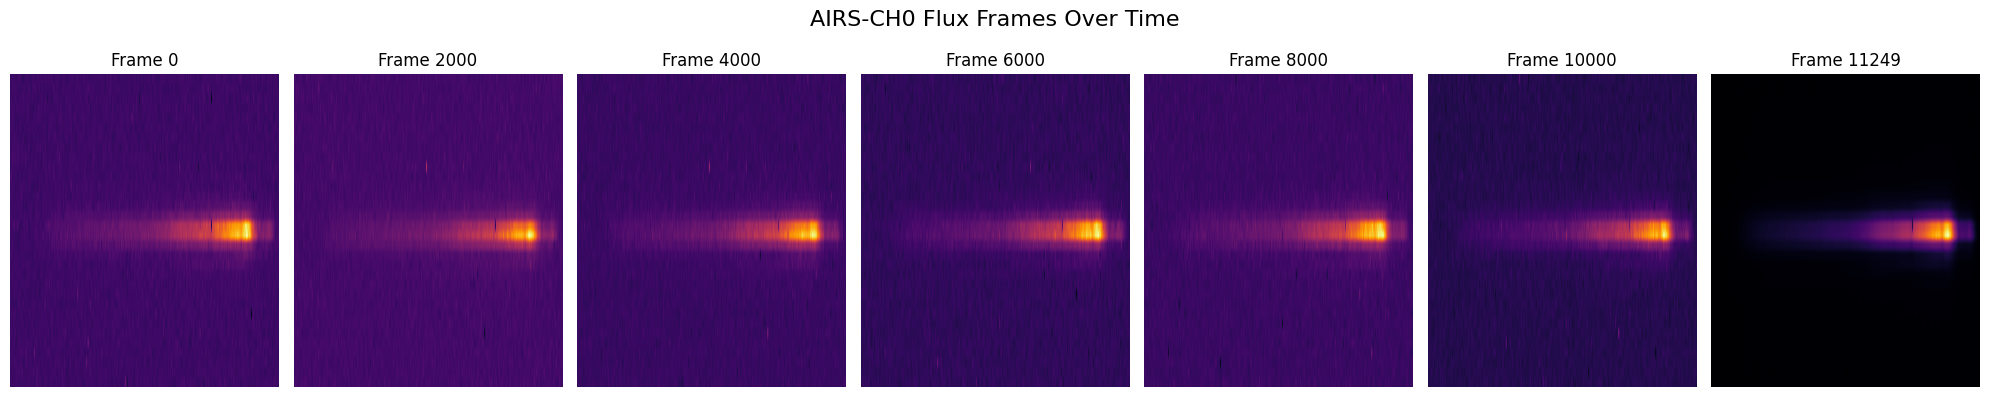

In [3]:
# Replace with the actual path to one sample file
airs_path = "/kaggle/input/ariel-data-challenge-2025/train/1010375142/AIRS-CH0_signal_0.parquet"

df = pd.read_parquet(airs_path)  # shape: (11250, 11392)

# === Step 2: Convert to 3D signal array ===
signal_raw_unflat = df.values  # shape: (11250, 11392)
signal_raw = signal_raw_unflat.reshape(-1, 32, 356)  # shape: (11250, 32, 356)

# === Step 3: Apply gain and offset ===
gain = 0.4369
offset = -1000.0
signal_flux = signal_raw * gain + offset  # shape: (11250, 32, 356)

# Select time steps to visualize
frame_indices = [0, 2000, 4000, 6000, 8000, 10000, 11249]  # start, middle, end
n_frames = len(frame_indices)

# Plot
fig, axes = plt.subplots(1, n_frames, figsize=(20, 4))
for i, idx in enumerate(frame_indices):
    ax = axes[i]
    ax.imshow(signal_flux[idx], cmap="inferno", aspect="auto")
    ax.set_title(f"Frame {idx}")
    ax.axis("off")

plt.suptitle("AIRS-CH0 Flux Frames Over Time", fontsize=16)
plt.tight_layout()
plt.show()



In [4]:
frame_idx = 5000  # example index
frame_raw = signal_raw[frame_idx]
frame_flux = signal_flux[frame_idx]

print("🔢 Raw Pixel Values (uint16):")
print(frame_raw)

print("\n💡 Flux Values (converted):")
print(frame_flux)

🔢 Raw Pixel Values (uint16):
[[435 426 436 ... 432 439 439]
 [438 438 430 ... 435 429 437]
 [435 428 445 ... 436 438 421]
 ...
 [432 433 436 ... 433 429 433]
 [433 444 452 ... 437 441 438]
 [432 422 428 ... 434 435 439]]

💡 Flux Values (converted):
[[-809.9485 -813.8806 -809.5116 ... -811.2592 -808.2009 -808.2009]
 [-808.6378 -808.6378 -812.133  ... -809.9485 -812.5699 -809.0747]
 [-809.9485 -813.0068 -805.5795 ... -809.5116 -808.6378 -816.0651]
 ...
 [-811.2592 -810.8223 -809.5116 ... -810.8223 -812.5699 -810.8223]
 [-810.8223 -806.0164 -802.5212 ... -809.0747 -807.3271 -808.6378]
 [-811.2592 -815.6282 -813.0068 ... -810.3854 -809.9485 -808.2009]]


# Axis info

In [5]:
axis_info = pd.read_parquet("/kaggle/input/ariel-data-challenge-2025/axis_info.parquet")
print(axis_info.iloc[:357])


     AIRS-CH0-axis0-h  AIRS-CH0-axis2-um  AIRS-CH0-integration_time  \
0            0.000028           4.078463                        0.1   
1            0.000056           4.074023                        4.5   
2            0.001361           4.069568                        0.1   
3            0.001389           4.065100                        4.5   
4            0.002694           4.060618                        0.1   
..                ...                ...                        ...   
352          0.234694           1.661217                        0.1   
353          0.234722           1.651909                        4.5   
354          0.236028           1.642588                        0.1   
355          0.236056           1.633253                        4.5   
356          0.237361                NaN                        0.1   

     FGS1-axis0-h  
0        0.000028  
1        0.000056  
2        0.000139  
3        0.000167  
4        0.000250  
..            ...  
352    

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


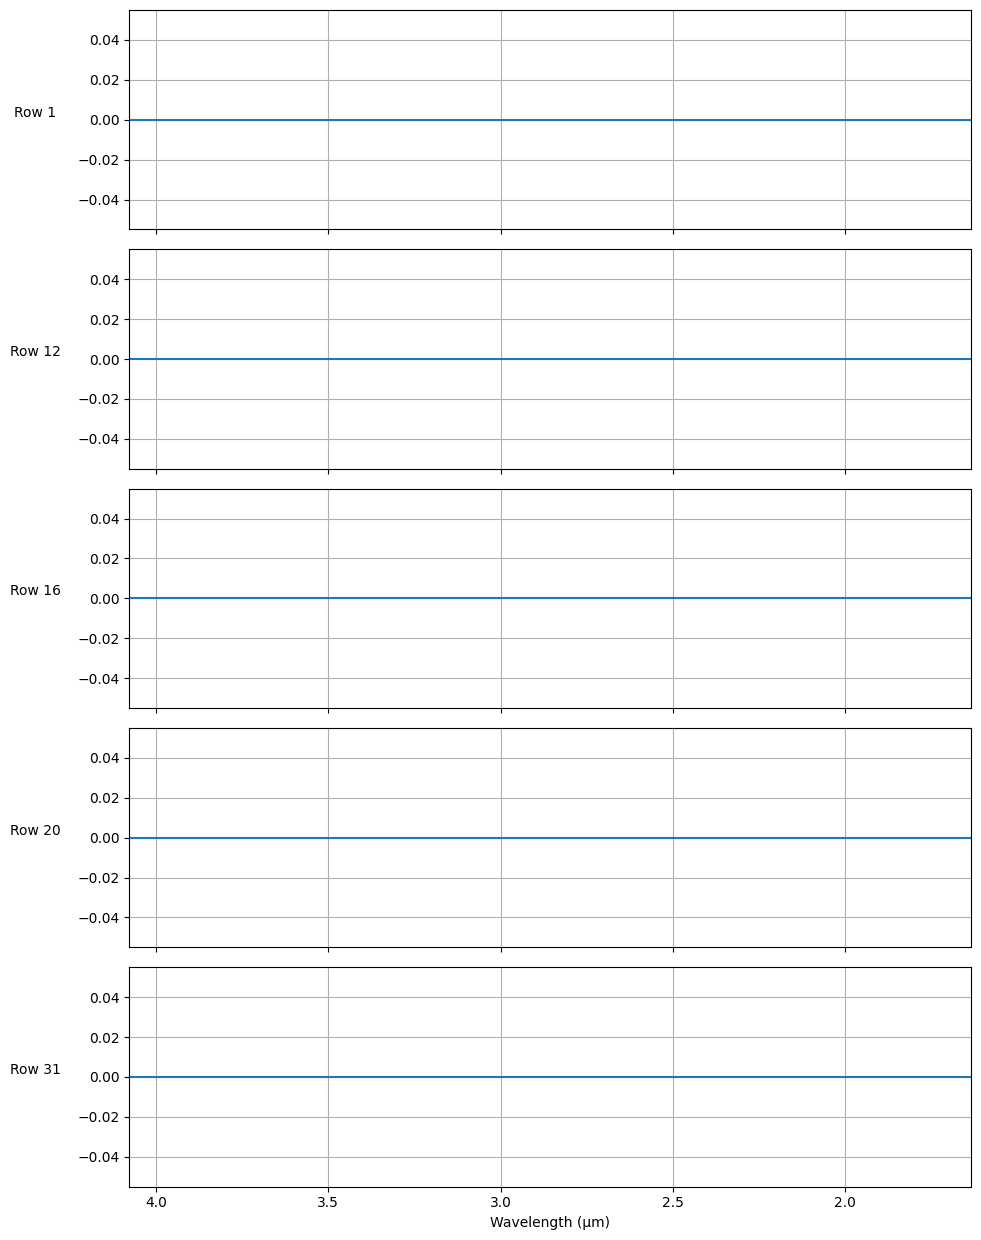

In [15]:
# ---- Define constants ----
rows_to_plot = [1, 12, 16, 20, 31]
start_frame = 200
end_frame = 210  # total ~10 frames
frame_range = range(start_frame, end_frame)

# ---- Load wavelength (should be length 356) ----
wave_len = axis_info['AIRS-CH0-axis2-um'].dropna().values  # shape: (356,)

# ---- Ensure signal_flux is (n_frames, 32, 356) ----
assert signal_flux.ndim == 3 and signal_flux.shape[1:] == (32, 356), "Unexpected shape for signal_flux"

# ---- Create plot ----
fig, axes = plt.subplots(len(rows_to_plot), 1, figsize=(10, 2.5 * len(rows_to_plot)), sharex=True)
if len(rows_to_plot) == 1:
    axes = [axes]

lines = []
for ax, row in zip(axes, rows_to_plot):
    line, = ax.plot(wave_len, np.zeros_like(wave_len))
    ax.set_ylabel(f"Row {row}", rotation=0, labelpad=30)
    ax.set_xlim(wave_len[0], wave_len[-1])
    ax.grid(True)
    lines.append(line)
axes[-1].set_xlabel("Wavelength (µm)")
fig.tight_layout()

# ---- Init function ----
def init():
    for line in lines:
        line.set_ydata(np.zeros_like(wave_len))
    return lines

# ---- Update function ----
def update(frame_idx):
    frame = signal_flux[frame_idx]
    for i, row_idx in enumerate(rows_to_plot):
        flux = frame[row_idx]
        lines[i].set_ydata(flux)
        axes[i].set_ylim(flux.min() * 0.95, flux.max() * 1.05)
    fig.suptitle(f"AIRS-CH0 Spectra — Frame {frame_idx}", fontsize=14)
    return lines

# ---- Create animation ----
anim = FuncAnimation(fig, update, frames=frame_range, init_func=init, blit=False, interval=500)

# ---- Display in notebook ----
HTML(anim.to_html5_video())


# Unflat FGS1

FGS1 signal shape: (135000, 32, 32)


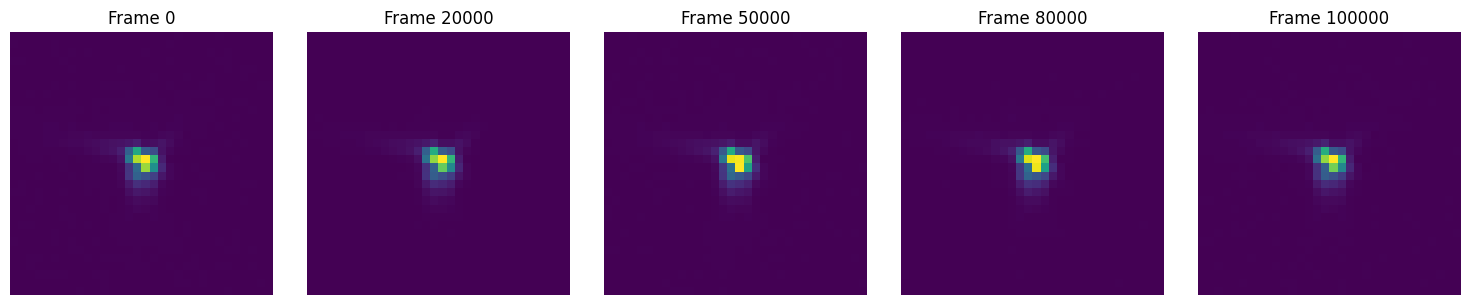

In [21]:
fgs_path = "/kaggle/input/ariel-data-challenge-2025/train/1010375142/FGS1_signal_0.parquet"
fgs_signal_raw = pd.read_parquet(fgs_path).values  # shape: (135000, 1024)

# --- Unflatten to (135000, 32, 32) ---
fgs_signal = fgs_signal_raw.reshape(-1, 32, 32)
print("FGS1 signal shape:", fgs_signal.shape)

# --- Show some frames ---
fig, axes = plt.subplots(1, 5, figsize=(15, 3))
for i, frame_idx in enumerate([0, 20000, 50000, 80000, 100000]):
    axes[i].imshow(fgs_signal[frame_idx], cmap='viridis')
    axes[i].set_title(f"Frame {frame_idx}")
    axes[i].axis('off')
plt.tight_layout()
plt.show()


# Show flux after conversion

In [22]:
print(signal_flux.shape)

(11250, 32, 356)


# Foreground subtraction

In [23]:
def subtract_foreground(signal_flux, row_foreground=(range(0, 8), range(24, 32)), row_target=range(8, 24)):
    """
    Subtract estimated foreground (from top & bottom rows) from center rows
    """
    # Combine top and bottom rows
    top_rows = signal_flux[:, row_foreground[0], :]
    bottom_rows = signal_flux[:, row_foreground[1], :]
    foreground = np.concatenate([top_rows, bottom_rows], axis=1)  # shape: (11250, 16, 356)

    # Average over foreground rows
    foreground_mean = foreground.mean(axis=1, keepdims=True)  # shape: (11250, 1, 356)

    # Copy original signal
    corrected_signal = np.copy(signal_flux)

    # Subtract from target rows only
    corrected_signal[:, row_target, :] -= foreground_mean

    return corrected_signal


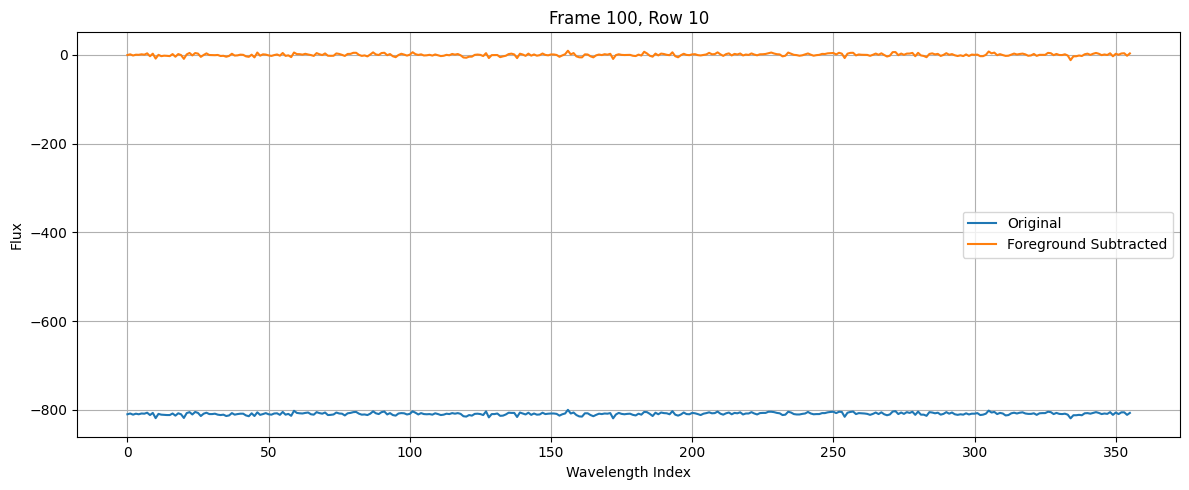

In [24]:
# Apply foreground subtraction
signal_flux_fg_sub = subtract_foreground(signal_flux)

# Plot row 10 before and after subtraction for a single frame
import matplotlib.pyplot as plt

frame_idx = 100
row_idx = 10

plt.figure(figsize=(12, 5))
plt.plot(signal_flux[frame_idx, row_idx, :], label='Original')
plt.plot(signal_flux_fg_sub[frame_idx, row_idx, :], label='Foreground Subtracted')
plt.xlabel("Wavelength Index")
plt.ylabel("Flux")
plt.title(f"Frame {frame_idx}, Row {row_idx}")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
